In [24]:
import netCDF4 as nc
import rasterio
import xarray as xr
import matplotlib.pyplot as plt


In [14]:
# File paths
file_paths = [
    'data/daily_average_temperature/t2m_mean.daily.calc.era5.0d50_CentralEurope.2018.nc',
    'data/daily_average_temperature/t2m_mean.daily.calc.era5.0d50_CentralEurope.2019.nc',
    'data/daily_average_temperature/t2m_mean.daily.calc.era5.0d50_CentralEurope.2020.nc',
    'data/daily_average_temperature/t2m_mean.daily.calc.era5.0d50_CentralEurope.2021.nc'
]

# Load the data
data_sets = [xr.open_dataset(fp) for fp in file_paths]

# Assuming the variable name is consistent and known, typically it might be named 'temperature' or similar
# We'll check the first dataset for the variable name to use
variable_name = list(data_sets[0].data_vars)[0]  # Use the first variable available
variable_name



't2m'

In [21]:
# Combine the datasets along the time dimension and calculate the maximum for each grid cell across the years
combined_data = xr.concat(data_sets, dim='time')
max_temperature = combined_data['t2m'].max(dim='time')

max_temperature.to_netcdf('data/aggregated_over_years_model_input/t_max.nc')

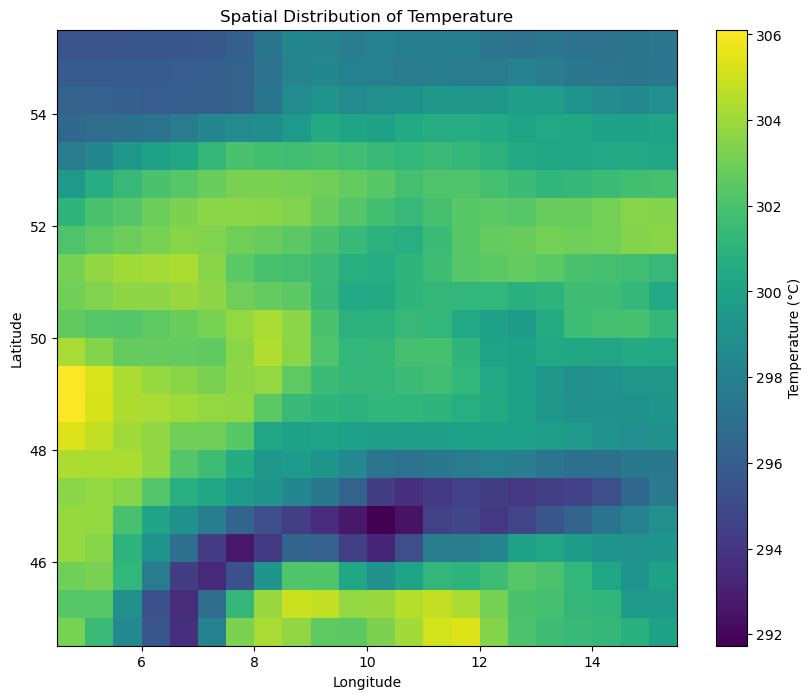

In [26]:

data = xr.open_dataset('data/aggregated_over_years_model_input/t_max.nc')

# Extract the variable for plotting
temp = data['t2m']

# Create the plot
plt.figure(figsize=(10, 8))
plt.pcolormesh(temp.lon, temp.lat, temp, shading='auto', cmap='viridis')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Temperature')
plt.show()
